#  Case-study on real Time dataset using Artificial Neural Networks 2

We are going to do a case study on case study on real time dataset using Arificial Neural Network(ANN).
The dataset in which we going to do the ANN is related to the red variants of the Portuguese "Vinho Verde" wine whether a red wine is of good quality or not according to its chemical properties.

In [22]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [23]:
#Import the dataset
data=pd.read_csv('C:/Users/aksha/Desktop/ai/datasets/winequal/redwinequal.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
data.shape

(1599, 12)

This dataset contains 1599 rows and 12 columns. The  columns are namely the different chemical properties in a wine that helps in maintaining the quality of a wine.

1) fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

2) volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
3) citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines.
4) residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

5) chlorides: he amount of salt in the wine.

6) free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

7) total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

8) density: the density of water is close to that of water depending on the percent alcohol and sugar content.

9) pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

10) sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

11) alcohol: the percent alcohol content of the wine.

12) quality: output variable (based on sensory data, score between 0 and 10).7 or higher getting classified as 'good' and the remainder as 'not good'

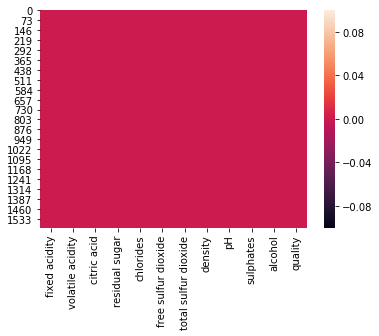

In [25]:
sb.heatmap(data.isnull())

the above data shows that there is no null value.

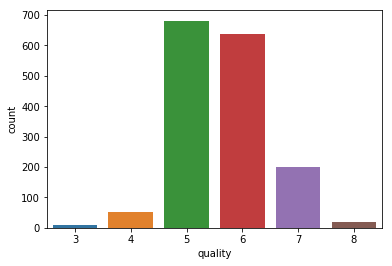

In [26]:
sb.countplot(data['quality'])

the above data contains highest number of results that lead to 5 followed by 6.

In [28]:
for index, row in data.iterrows():
    A=row['quality']
    if(A>=7):
        data.loc[index,'Good'] = 1
    else:
        data.loc[index,'Good'] = 0

In [29]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Good
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,0.0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,1.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,1.0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0.0


In [30]:
data.drop('quality',axis=1,inplace=True)

In [31]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Good
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,0.0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,1.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,1.0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0.0


In [33]:
x=data.iloc[:,0:11].values
y=data.iloc[:,11].values

In [34]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [35]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
#Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [38]:
x_test

array([[ 1.41998736, -0.32881689,  0.80712824, ..., -0.90851928,
         0.57743564,  0.36384892],
       [-0.13687277,  1.58928164, -1.39201131, ...,  0.32598793,
        -0.73852533, -0.76727388],
       [ 0.43974209, -1.31526756,  0.29570044, ..., -0.3237527 ,
         1.03516119,  1.21219102],
       ...,
       [ 0.43974209, -1.04125349,  0.75598546, ..., -0.84354521,
        -0.62409394,  0.92941032],
       [ 0.43974209,  1.28786615, -1.18744019, ..., -0.12883051,
        -0.68130963, -0.67301364],
       [-0.07921128, -1.15085912,  0.75598546, ..., -0.25877864,
        -0.62409394,  1.77775242]])

In [39]:
#import the keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [41]:
#Initialising the ANN
classifier=Sequential()
#Adding the input and first hidden layer
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=11))
#Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
#Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
#Compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Fitting the ANN to the training set
classifier.fit(x_train,y_train,batch_size=10,epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1279/1279 [==============================] - 4s 3ms/step - loss: 0.6435 - acc: 0.8538
Epoch 2/100
1279/1279 [==============================] - 0s 220us/step - loss: 0.3995 - acc: 0.8538
Epoch 3/100
1279/1279 [==============================] - 0s 203us/step - loss: 0.3140 - acc: 0.8538
Epoch 4/100
1279/1279 [==============================] - 0s 181us/step - loss: 0.3016 - acc: 0.8538
Epoch 5/100
1279/1279 [==============================] - 0s 177us/step - loss: 0.2945 - acc: 0.8538
Epoch 6/100
1279/1279 [==============================] - 0s 177us/step - loss: 0.2898 - acc: 0.8538
Epoch 7/100
1279/1279 [==============================] - 0s 181us/step - loss: 0.2859 - acc: 0.8538
Epoch 8/100
1279/1279 [==============================] - 0s 203us/step - loss: 0.2827 - acc: 0.8538
Epoch 9/100
1279/1279 [==============================] - 0s 180us/step - loss: 0.2792 - acc: 0.8538
Epoch 10/100
1279/1279 [==============================

In [42]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

In [43]:
#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy score:',accuracy_score(y_test,y_pred))

accuracy score: 0.88125


In [44]:
y_pred

array([[False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [45]:
#confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [46]:
print('confusion_matrix:',confusion_matrix(y_test,y_pred),sep='\n')

confusion_matrix:
[[267  23]
 [ 15  15]]


In [48]:
print('accuracy score:',accuracy_score(y_test,y_pred))

accuracy score: 0.88125


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93       290
         1.0       0.39      0.50      0.44        30

   micro avg       0.88      0.88      0.88       320
   macro avg       0.67      0.71      0.69       320
weighted avg       0.90      0.88      0.89       320



# ROC

In [50]:
#Importing ROC-AUC packages
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [51]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='red',label='ROC')
    plt.plot([1,0],[0,1],color='black',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC(Receiver Operating Curve)')
    plt.legend()
    plt.show()
    

In [53]:
probs=classifier.predict_proba(x_test)
probs

array([[1.95495486e-01],
       [3.69989872e-03],
       [6.84415221e-01],
       [4.37611341e-03],
       [1.05765909e-01],
       [5.95599413e-04],
       [2.12022960e-02],
       [1.14478350e-01],
       [1.15251541e-03],
       [6.76721334e-04],
       [8.03405046e-03],
       [8.47470760e-03],
       [4.27596569e-02],
       [6.83656335e-03],
       [2.85686553e-02],
       [5.22508919e-01],
       [7.35956430e-01],
       [2.14512050e-02],
       [1.01836294e-01],
       [4.97946143e-03],
       [7.03291535e-01],
       [6.76622987e-03],
       [5.56654930e-02],
       [3.11029673e-01],
       [9.05382633e-03],
       [6.03258610e-04],
       [1.75768137e-03],
       [6.74243748e-01],
       [2.62394547e-03],
       [1.10695899e-01],
       [1.20148331e-01],
       [1.18686199e-01],
       [2.66948342e-02],
       [9.03838873e-03],
       [1.05803043e-01],
       [4.21954989e-01],
       [2.62337923e-03],
       [4.16301787e-02],
       [2.97777921e-01],
       [9.87578630e-02],


In [55]:
auc=roc_auc_score(y_test,probs)
print('AUC:%.2f'%auc)

AUC:0.88


In [57]:
fpr,tpr,thresholds=roc_curve(y_test,probs)

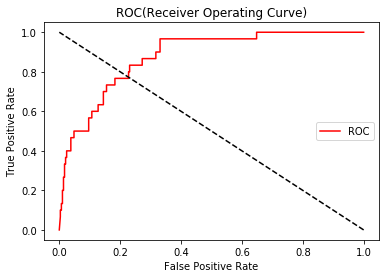

In [58]:
plot_roc_curve(fpr,tpr)